In [19]:
import scrapy
from scrapy.crawler import CrawlerProcess
import numpy as np

import sklearn
import sklearn.model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

2023-03-02 10:14:48 [matplotlib] DEBUG: matplotlib data path: C:\Users\Anisha\anaconda3\lib\site-packages\matplotlib\mpl-data
2023-03-02 10:14:48 [matplotlib] DEBUG: CONFIGDIR=C:\Users\Anisha\.matplotlib
2023-03-02 10:14:48 [matplotlib] DEBUG: interactive is False
2023-03-02 10:14:48 [matplotlib] DEBUG: platform is win32
2023-03-02 10:14:48 [matplotlib] DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'nt', 'winreg', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', 'encodings.cp1252', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'ntpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', '_distutils_hack', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', '_heapq', 'heapq', 'itertools', 'keyw

In [2]:
fund_schemes = []
class DataSpider(scrapy.Spider):
    name = 'data'
    allowed_domains = ['www.etmoney.com']
    start_urls = ['http://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=21',
                  'https://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=11',
                  'https://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=37',
                  'https://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=20',
                  'https://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=4',
                  'https://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=32',
                  'https://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=55',
                  'https://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=41',
                  'https://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=36',
                  'https://www.etmoney.com/mutual-funds/all-funds-listing?fundHouse=49']

    def parse(self, response):
         rows = response.xpath("//div[@class='scheme-name']/a/@href").getall()
         for row in rows :
            yield response.follow(url=row, callback=self.funds)

    def funds(self, response):
        companyname = response.xpath("//h3[@class='h3 scheme-managed-title']/text()").get()
        aum = response.xpath("(//p[@class='amount-heading'])[2]/text()").get()
        aum = aum.replace(',','')
        aum = int((aum.split(' ')[0])[1:])
        schemename = response.xpath("//h1/text()").get()
        schemetype = response.xpath("(//div[@class='wrape-category-tags']/a)[1]/@title").get()
        schemeduration = response.xpath("(//div[@class='wrape-category-tags']/a)[2]/@title").get()
        schemerisk = response.xpath("//div[@id='riskometer']//span/text()").get()
        schemenav = response.xpath("//div[@class='overview-date']//span[@class='amount']/text()").get()
        schemenav = schemenav.replace(',','')
        schemenav = float(schemenav)
        schemereturns = float(response.xpath("//div[@class='overview-date returnInception']//span[@class='amount']/text()").get()[:-1])
        vrorating = int(response.xpath("//span[@class='category-rank-value']/span/text()").get())
        schemeaum = response.xpath("//table[@class='key-parameters-details key-parameters-table']//tbody//tr[5]//span[2]/text()").get()
        schemeaum = schemeaum.replace(',','')
        schemeaum = int((schemeaum.split(' ')[0])[0:])
        mininvestment = response.xpath("//table[@class='key-parameters-details key-parameters-table']//tbody//tr[9]//p[@class='lumpsum-table-text']/span[2]/text()").get()
        fund_ret_1m = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[1]/td[2]/span/text()").get()[:-1])
        fund_ret_3m = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[2]/td[2]/span/text()").get()[:-1])
        fund_ret_6m = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[3]/td[2]/span/text()").get()[:-1])
        fund_ret_1y = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[4]/td[2]/span/text()").get()[:-1])
        fund_ret_3y = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[5]/td[2]/span/text()").get()[:-1])
        fund_ret_5y = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[6]/td[2]/span/text()").get()[:-1])
        cat_ret_1m = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[1]/td[3]/span/text()").get()[:-1])
        cat_ret_3m = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[2]/td[3]/span/text()").get()[:-1])
        cat_ret_6m = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[3]/td[3]/span/text()").get()[:-1])
        cat_ret_1y = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[4]/td[3]/span/text()").get()[:-1])
        cat_ret_3y = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[5]/td[3]/span/text()").get()[:-1])
        cat_ret_5y = float(response.xpath("//table[@id='trailingReturnTable']/tbody/tr[6]/td[3]/span/text()").get()[:-1])

        fscheme_dict = {
            'companyname': companyname,
            'aum': aum,
            'schemename': schemename,
            'schemetype': schemetype,
            'schemeduration': schemeduration,
            'schemerisk': schemerisk,
            'schemenav': schemenav,
            'schemereturns': schemereturns,
            'vrorating': vrorating,
            'schemeaum': schemeaum,
            'mininvestment': mininvestment,
            'fund_ret_1m': fund_ret_1m,
            'fund_ret_3m': fund_ret_3m,
            'fund_ret_6m': fund_ret_6m,
            'fund_ret_1y': fund_ret_1y,
            'fund_ret_3y': fund_ret_3y,
            'fund_ret_5y': fund_ret_5y,
            'cat_ret_1m': cat_ret_1m,
            'cat_ret_3m': cat_ret_3m,
            'cat_ret_6m': cat_ret_6m,
            'cat_ret_1y': cat_ret_1y,
            'cat_ret_3y': cat_ret_3y,
            'cat_ret_5y': cat_ret_5y,
            'diff_fund_cat_1m': fund_ret_1m-cat_ret_1m,
            'diff_fund_cat_3m': fund_ret_3m-cat_ret_1m,
            'diff_fund_cat_6m': fund_ret_6m-cat_ret_1m,
            'diff_fund_cat_1y': fund_ret_1y-cat_ret_1m,
            'diff_fund_cat_3y': fund_ret_3y-cat_ret_1m,
            'diff_fund_cat_5y': fund_ret_5y-cat_ret_1m
        }
        
        fund_schemes.append(fscheme_dict)

In [3]:
process = CrawlerProcess()

process.crawl(DataSpider)
process.start()

2023-03-02 10:00:34 [scrapy.utils.log] INFO: Scrapy 2.6.2 started (bot: scrapybot)
2023-03-02 10:00:34 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.2.0, Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 22.0.0 (OpenSSL 1.1.1q  5 Jul 2022), cryptography 37.0.1, Platform Windows-10-10.0.19045-SP0
2023-03-02 10:00:34 [scrapy.crawler] INFO: Overridden settings:
{}
2023-03-02 10:00:34 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2023-03-02 10:00:34 [scrapy.extensions.telnet] INFO: Telnet Password: 4a13694627e7a741
2023-03-02 10:00:34 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2023-03-02 10:00:34 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scr

In [4]:
print( len( fund_schemes ), '\n\n', fund_schemes[:10])

161 

 [{'companyname': 'Kotak Mahindra Mutual Fund', 'aum': 288634, 'schemename': 'Kotak Gilt Investment Direct-Growth', 'schemetype': 'debt', 'schemeduration': 'GILT', 'schemerisk': None, 'schemenav': 89.51, 'schemereturns': 8.26, 'vrorating': 4, 'schemeaum': 1594, 'mininvestment': '5000', 'fund_ret_1m': 0.27, 'fund_ret_3m': 1.06, 'fund_ret_6m': 3.01, 'fund_ret_1y': 4.59, 'fund_ret_3y': 6.09, 'fund_ret_5y': 8.51, 'cat_ret_1m': -0.12, 'cat_ret_3m': 0.74, 'cat_ret_6m': 2.34, 'cat_ret_1y': 3.88, 'cat_ret_3y': 5.19, 'cat_ret_5y': 7.69, 'diff_fund_cat_1m': 0.39, 'diff_fund_cat_3m': 1.1800000000000002, 'diff_fund_cat_6m': 3.13, 'diff_fund_cat_1y': 4.71, 'diff_fund_cat_3y': 6.21, 'diff_fund_cat_5y': 8.629999999999999}, {'companyname': 'ICICI Prudential Mutual Fund', 'aum': 510365, 'schemename': 'ICICI Prudential Bond Fund Direct Plan-Growth', 'schemetype': 'debt', 'schemeduration': 'MEDIUM TO LONG DURATION', 'schemerisk': 'Moderate', 'schemenav': 34.72, 'schemereturns': 8.0, 'vrorating': 3,

In [5]:
import csv
out_path= "./fund_schemes.txt"
out_file = open(out_path, 'w')

fieldnames = sorted(list(set(k for d in fund_schemes for k in d)))
writer = csv.DictWriter(out_file, fieldnames=fieldnames, dialect='excel')

writer.writeheader() # Assumes Python >= 2.7
for row in fund_schemes:
    writer.writerow(row)
out_file.close()

In [6]:
def encode_risk(risk_text):
    # The higher the risk, the lower the score!
    risk = {
        'Very High': 1,
        'High': 2,
        'Moderately High': 3,
        'Moderate': 4,
        'Low to Moderate': 5,
        'Low': 6
    }
    try:
        return risk[risk_text]
    except:
        return 0

In [8]:
for idx, scheme in enumerate( fund_schemes ):
    ##
    # Step 1: Convert numerical features appearing as text to numerical features
    #         1.a: Encode risk text to a numerical representation of risk.
    #              Highest risk gets the lowest score, lowest risk gets the highest score
    #
    #         1.b: Convert numbers formatted with commas or currency or rating description to just numbers
    ##
    
    # Convert scheme risk text to a numerical attribute
    fund_schemes[idx]['num_scheme_risk']            = encode_risk( scheme['schemerisk'] )
    
    fund_schemes[idx]['cstm_mtrc_risk_rating'] = fund_schemes[idx]['num_scheme_risk'] / 5.0
    
    # Score between 0 and 1 based on CRISIL rating
    fund_schemes[idx]['cstm_mtrc_vro']  = fund_schemes[idx]['vrorating'] / 5.0 if fund_schemes[idx]['vrorating'] else 0
    
    # Score between 0 and 1 based on AUM allocation to the scheme compared to other schemes in the fund family
    fund_schemes[idx]['cstm_mtrc_alloc'] = float( fund_schemes[idx]['schemeaum'] ) / ( fund_schemes[idx]['aum'] - fund_schemes[idx]['schemeaum'] )
    
    # Score between 0 and 1 based on fund performance relative to category performance
    fund_schemes[idx]['cstm_mtrc_diff_1m'] = 1 if fund_schemes[idx]['diff_fund_cat_1m'] and fund_schemes[idx]['diff_fund_cat_1m'] > 0 else 0
    fund_schemes[idx]['cstm_mtrc_diff_3m'] = 1 if fund_schemes[idx]['diff_fund_cat_3m'] and fund_schemes[idx]['diff_fund_cat_3m'] > 0 else 0
    fund_schemes[idx]['cstm_mtrc_diff_6m'] = 1 if fund_schemes[idx]['diff_fund_cat_6m'] and fund_schemes[idx]['diff_fund_cat_6m'] > 0 else 0
    fund_schemes[idx]['cstm_mtrc_diff_1y'] = 1 if fund_schemes[idx]['diff_fund_cat_1y'] and fund_schemes[idx]['diff_fund_cat_1y'] > 0 else 0
    fund_schemes[idx]['cstm_mtrc_diff_3y'] = 1 if fund_schemes[idx]['diff_fund_cat_3y'] and fund_schemes[idx]['diff_fund_cat_3y'] > 0 else 0
    fund_schemes[idx]['cstm_mtrc_diff_5y'] = 1 if fund_schemes[idx]['diff_fund_cat_5y'] and fund_schemes[idx]['diff_fund_cat_5y'] > 0 else 0

     # Initialize a set of lists to contain class labels based on time frame
    normal_scores_1m = [
        fund_schemes[idx]['cstm_mtrc_risk_rating'],
        fund_schemes[idx]['cstm_mtrc_vro'],
        fund_schemes[idx]['cstm_mtrc_alloc'],
        fund_schemes[idx]['cstm_mtrc_diff_1m']
    ]
    
    normal_scores_3m = [
        fund_schemes[idx]['cstm_mtrc_risk_rating'],
        fund_schemes[idx]['cstm_mtrc_vro'],
        fund_schemes[idx]['cstm_mtrc_alloc'],
        fund_schemes[idx]['cstm_mtrc_diff_3m']
    ]
    
    normal_scores_6m = [
        fund_schemes[idx]['cstm_mtrc_risk_rating'],
        fund_schemes[idx]['cstm_mtrc_vro'],
        fund_schemes[idx]['cstm_mtrc_alloc'],
        fund_schemes[idx]['cstm_mtrc_diff_6m']
    ]
    
    normal_scores_1y = [
        fund_schemes[idx]['cstm_mtrc_risk_rating'],
        fund_schemes[idx]['cstm_mtrc_vro'],
        fund_schemes[idx]['cstm_mtrc_alloc'],
        fund_schemes[idx]['cstm_mtrc_diff_1y']
    ]
    
    normal_scores_3y = [
        fund_schemes[idx]['cstm_mtrc_risk_rating'],
        fund_schemes[idx]['cstm_mtrc_vro'],
        fund_schemes[idx]['cstm_mtrc_alloc'],
        fund_schemes[idx]['cstm_mtrc_diff_3y']
    ]
    
    normal_scores_5y = [
        fund_schemes[idx]['cstm_mtrc_risk_rating'],
        fund_schemes[idx]['cstm_mtrc_vro'],
        fund_schemes[idx]['cstm_mtrc_alloc'],
        fund_schemes[idx]['cstm_mtrc_diff_5y']
    ]
    
    ##
    # Calculate labels for each time frame based on calculated metrics
    ## 
    ##
    labels_1m = round( float( sum(normal_scores_1m ) ) / max( len( normal_scores_1m ), 1 ) )
    labels_3m = round( float( sum(normal_scores_3m ) ) / max( len( normal_scores_3m ), 1 ) )
    labels_6m = round( float( sum(normal_scores_6m ) ) / max( len( normal_scores_6m ), 1 ) )
    labels_1y = round( float( sum(normal_scores_1y ) ) / max( len( normal_scores_1y ), 1 ) )
    labels_3y = round( float( sum(normal_scores_3y ) ) / max( len( normal_scores_3y ), 1 ) )
    labels_5y = round( float( sum(normal_scores_5y ) ) / max( len( normal_scores_5y ), 1 ) )

    # Store the labels for each time frame along with scheme details
    fund_schemes[idx]['calculated_label_1m'] = labels_1m
    fund_schemes[idx]['calculated_label_3m'] = labels_3m
    fund_schemes[idx]['calculated_label_6m'] = labels_6m
    fund_schemes[idx]['calculated_label_1y'] = labels_1y
    fund_schemes[idx]['calculated_label_3y'] = labels_3y
    fund_schemes[idx]['calculated_label_5y'] = labels_5y

In [11]:
some_val = list()
for scheme in fund_schemes:
    if scheme['vrorating'] not in some_val:
        some_val.append( scheme['vrorating'] )
    
print (set( some_val ))

{1, 2, 3, 4, 5}


In [12]:
import csv

keys = toCSV[0].keys()
with open('funds.csv', 'wb') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(toCSV)

NameError: name 'toCSV' is not defined

In [16]:
##
# Create target values for each time frame
##
Y_1m = np.array( [scheme['calculated_label_1m'] for scheme in fund_schemes] )
Y_3m = np.array( [scheme['calculated_label_3m'] for scheme in fund_schemes] )
Y_6m = np.array( [scheme['calculated_label_6m'] for scheme in fund_schemes] )
Y_1y = np.array( [scheme['calculated_label_1y'] for scheme in fund_schemes] )
Y_3y = np.array( [scheme['calculated_label_3y'] for scheme in fund_schemes] )
Y_5y = np.array( [scheme['calculated_label_5y'] for scheme in fund_schemes] )

In [17]:

X_1m = np.array(
    [
        [
            scheme['num_scheme_risk']           if scheme['num_scheme_risk'] else 0,
            scheme['vrorating']                 if scheme['vrorating'] else 0,
            scheme['aum']                       if scheme['aum'] else 0,
            scheme['schemeaum']                 if scheme['schemeaum'] else 0,
            scheme['schemenav']                 if scheme['schemenav'] else 0,
            scheme['mininvestment']             if scheme['mininvestment'] else 0,
            scheme['fund_ret_1m']               if scheme['fund_ret_1m'] else 0,
            scheme['cat_ret_1m']                if scheme['cat_ret_1m'] else 0
        ]
        for scheme in fund_schemes
    ]
)

X_3m = np.array(
    [
        [
            scheme['num_scheme_risk']           if scheme['num_scheme_risk'] else 0,
            scheme['vrorating']                 if scheme['vrorating'] else 0,
            scheme['aum']                       if scheme['aum'] else 0,
            scheme['schemeaum']                 if scheme['schemeaum'] else 0,
            scheme['schemenav']                 if scheme['schemenav'] else 0,
            scheme['mininvestment']             if scheme['mininvestment'] else 0,
            scheme['fund_ret_3m']               if scheme['fund_ret_3m'] else 0,
            scheme['cat_ret_3m']                if scheme['cat_ret_3m'] else 0
        ]
        for scheme in fund_schemes
    ], dtype = 'float64'
)
        
X_6m = np.array(
    [
        [
            scheme['num_scheme_risk']           if scheme['num_scheme_risk'] else 0,
            scheme['vrorating']                 if scheme['vrorating'] else 0,
            scheme['aum']                       if scheme['aum'] else 0,
            scheme['schemeaum']                 if scheme['schemeaum'] else 0,
            scheme['schemenav']                 if scheme['schemenav'] else 0,
            scheme['mininvestment']             if scheme['mininvestment'] else 0,
            scheme['fund_ret_6m']               if scheme['fund_ret_6m'] else 0,
            scheme['cat_ret_6m']                if scheme['cat_ret_6m'] else 0
        ]
        for scheme in fund_schemes
    ], dtype = 'float64'
)

X_1y = np.array(
    [
        [
            scheme['num_scheme_risk']           if scheme['num_scheme_risk'] else 0,
            scheme['vrorating']                 if scheme['vrorating'] else 0,
            scheme['aum']                       if scheme['aum'] else 0,
            scheme['schemeaum']                 if scheme['schemeaum'] else 0,
            scheme['schemenav']                 if scheme['schemenav'] else 0,
            scheme['mininvestment']             if scheme['mininvestment'] else 0,
            scheme['fund_ret_1y']               if scheme['fund_ret_1y'] else 0,
            scheme['cat_ret_1y']                if scheme['cat_ret_1y'] else 0
        ]
        for scheme in fund_schemes
    ], dtype = 'float64'
)

X_3y = np.array(
    [
        [
            scheme['num_scheme_risk']           if scheme['num_scheme_risk'] else 0,
            scheme['vrorating']                 if scheme['vrorating'] else 0,
            scheme['aum']                       if scheme['aum'] else 0,
            scheme['schemeaum']                 if scheme['schemeaum'] else 0,
            scheme['schemenav']                 if scheme['schemenav'] else 0,
            scheme['mininvestment']             if scheme['mininvestment'] else 0,
            scheme['fund_ret_3y']               if scheme['fund_ret_3y'] else 0,
            scheme['cat_ret_3y']                if scheme['cat_ret_3y'] else 0
        ]
        for scheme in fund_schemes
    ], dtype = 'float64'
)

X_5y = np.array(
    [
        [
            scheme['num_scheme_risk']           if scheme['num_scheme_risk'] else 0,
            scheme['vrorating']                 if scheme['vrorating'] else 0,
            scheme['aum']                       if scheme['aum'] else 0,
            scheme['schemeaum']                 if scheme['schemeaum'] else 0,
            scheme['schemenav']                 if scheme['schemenav'] else 0,
            scheme['mininvestment']             if scheme['mininvestment'] else 0,
            scheme['fund_ret_5y']               if scheme['fund_ret_5y'] else 0,
            scheme['cat_ret_5y']                if scheme['cat_ret_5y'] else 0
        ]
        for scheme in fund_schemes
    ], dtype = 'float64'
)
       

In [24]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values='NaN', strategy='mean')

X_1m = imp.fit_transform( X_1m )
X_3m = imp.fit_transform( X_3m )
X_6m = imp.fit_transform( X_6m )
X_1y = imp.fit_transform( X_1y )
X_2y = imp.fit_transform( X_2y )
X_3y = imp.fit_transform( X_3y )
X_5y = imp.fit_transform( X_5y )

ValueError: 'X' and 'missing_values' types are expected to be both numerical. Got X.dtype=float64 and  type(missing_values)=<class 'str'>.

In [27]:
import pandas as pd
num_trees = range(1, 41)

# Define folds = N for N-fold cross-validation
num_folds = 10

# Define a DF to store cross validation results
df_rf_1m = pd.DataFrame()
df_rf_3m = pd.DataFrame()
df_rf_6m = pd.DataFrame()
df_rf_1y = pd.DataFrame()
df_rf_3y = pd.DataFrame()
df_rf_5y = pd.DataFrame()

df_rf_1m['num_trees'] = [0]  * len( num_trees )
df_rf_1m['scores']    = [[]] * len( num_trees )

df_rf_3m['num_trees'] = [0]  * len( num_trees )
df_rf_3m['scores']    = [[]] * len( num_trees )

df_rf_6m['num_trees'] = [0]  * len( num_trees )
df_rf_6m['scores']    = [[]] * len( num_trees )

df_rf_1y['num_trees'] = [0]  * len( num_trees )
df_rf_1y['scores']    = [[]] * len( num_trees )

df_rf_3y['num_trees'] = [0]  * len( num_trees )
df_rf_3y['scores']    = [[]] * len( num_trees )

df_rf_5y['num_trees'] = [0]  * len( num_trees )
df_rf_5y['scores']    = [[]] * len( num_trees )

for num in num_trees:    
    forest = sklearn.ensemble.RandomForestClassifier(n_estimators = num)
    
    scores_1m = sklearn.model_selection.cross_val_score(forest, X_1m[:100, :], Y_1m[:100], scoring = 'f1', cv = num_folds)
    scores_3m = sklearn.model_selection.cross_val_score(forest, X_3m[:100, :], Y_3m[:100], scoring = 'f1', cv = num_folds)
    scores_6m = sklearn.model_selection.cross_val_score(forest, X_6m[:100, :], Y_6m[:100], scoring = 'f1', cv = num_folds)
    scores_1y = sklearn.model_selection.cross_val_score(forest, X_1y[:100, :], Y_1y[:100], scoring = 'f1', cv = num_folds)
    scores_3y = sklearn.model_selection.cross_val_score(forest, X_3y[:100, :], Y_3y[:100], scoring = 'f1', cv = num_folds)
    scores_5y = sklearn.model_selection.cross_val_score(forest, X_5y[:100, :], Y_5y[:100], scoring = 'f1', cv = num_folds)
    
    df_rf_1m['num_trees'][ num - 1] = num
    df_rf_3m['num_trees'][ num - 1] = num
    df_rf_6m['num_trees'][ num - 1] = num
    df_rf_1y['num_trees'][ num - 1] = num
    df_rf_3y['num_trees'][ num - 1] = num
    df_rf_5y['num_trees'][ num - 1] = num
    
    df_rf_1m['scores'][ num - 1] = scores_1m
    df_rf_3m['scores'][ num - 1] = scores_3m
    df_rf_6m['scores'][ num - 1] = scores_6m
    df_rf_1y['scores'][ num - 1] = scores_1y
    df_rf_3y['scores'][ num - 1] = scores_3y
    df_rf_5y['scores'][ num - 1] = scores_5y

2023-03-02 10:19:43 [py.warnings] WARNING: C:\Users\Anisha\AppData\Local\Temp\ipykernel_15516\922028316.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_1m['num_trees'][ num - 1] = num

2023-03-02 10:19:43 [py.warnings] WARNING: C:\Users\Anisha\AppData\Local\Temp\ipykernel_15516\922028316.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_3m['num_trees'][ num - 1] = num

2023-03-02 10:19:43 [py.warnings] WARNING: C:\Users\Anisha\AppData\Local\Temp\ipykernel_15516\922028316.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

2023-03-02 10:22:55 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
2023-03-02 10:22:55 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='C:\\Users\\Anisha\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-03-02 10:22:55 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='C:\\Users\\Anisha\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-03-02 10:22:55 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='C:\\Users\\Anisha\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=40

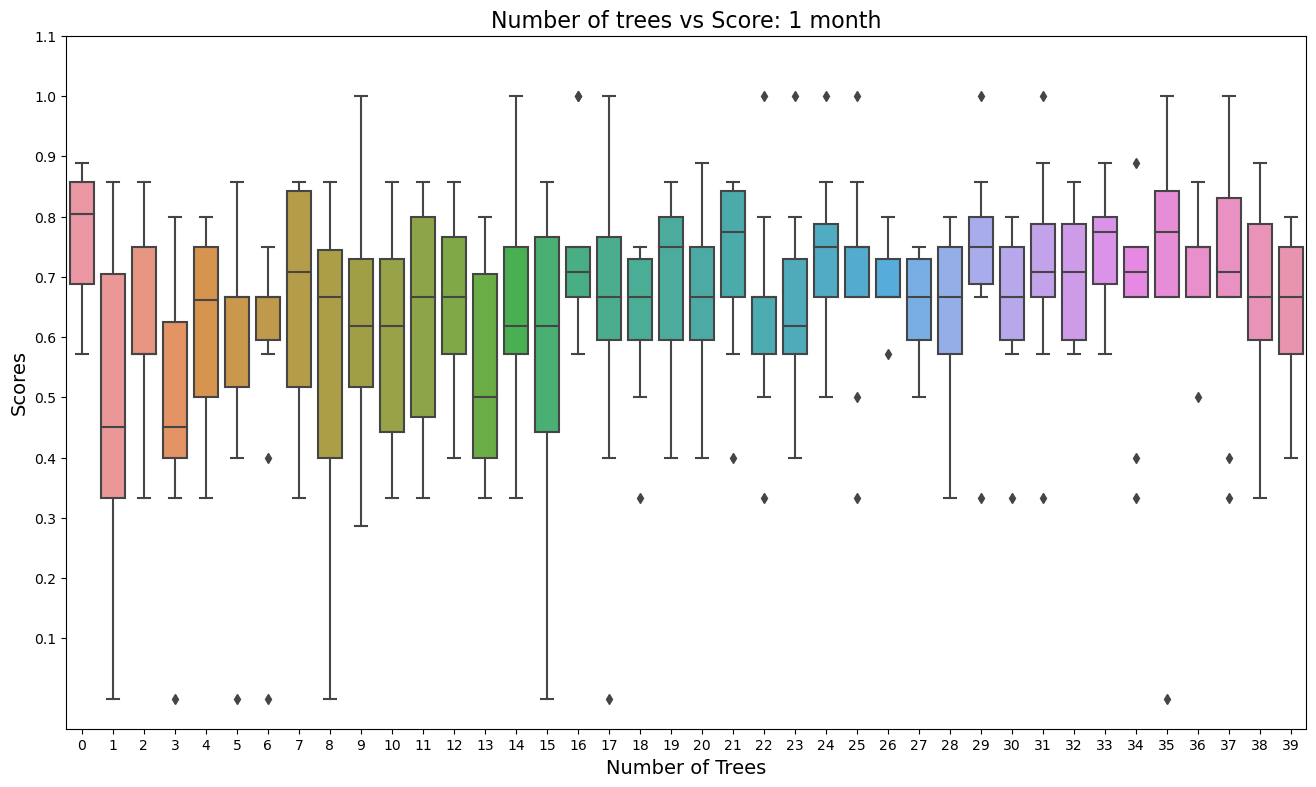

In [29]:
# plot the scores of the random forests as a function of the number of trees
plt.figure(figsize=(16,9))

# Scores of 10-fold cross-validation for random forests ranging from 1 to 40 trees as a box plot
sns.boxplot(data  = df_rf_1m.scores)

plt.title(  "Number of trees vs Score: 1 month", fontsize=16)
plt.xlabel( "Number of Trees", fontsize=14)
plt.ylabel( "Scores", fontsize=14)
plt.yticks( np.arange( 0.1, 1.2, 0.1 ) )
sns.set_context('poster')

2023-03-02 10:23:26 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=24.0.
2023-03-02 10:23:26 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='C:\\Users\\Anisha\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-03-02 10:23:26 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='C:\\Users\\Anisha\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-03-02 10:23:26 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='C:\\Users\\Anisha\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=40

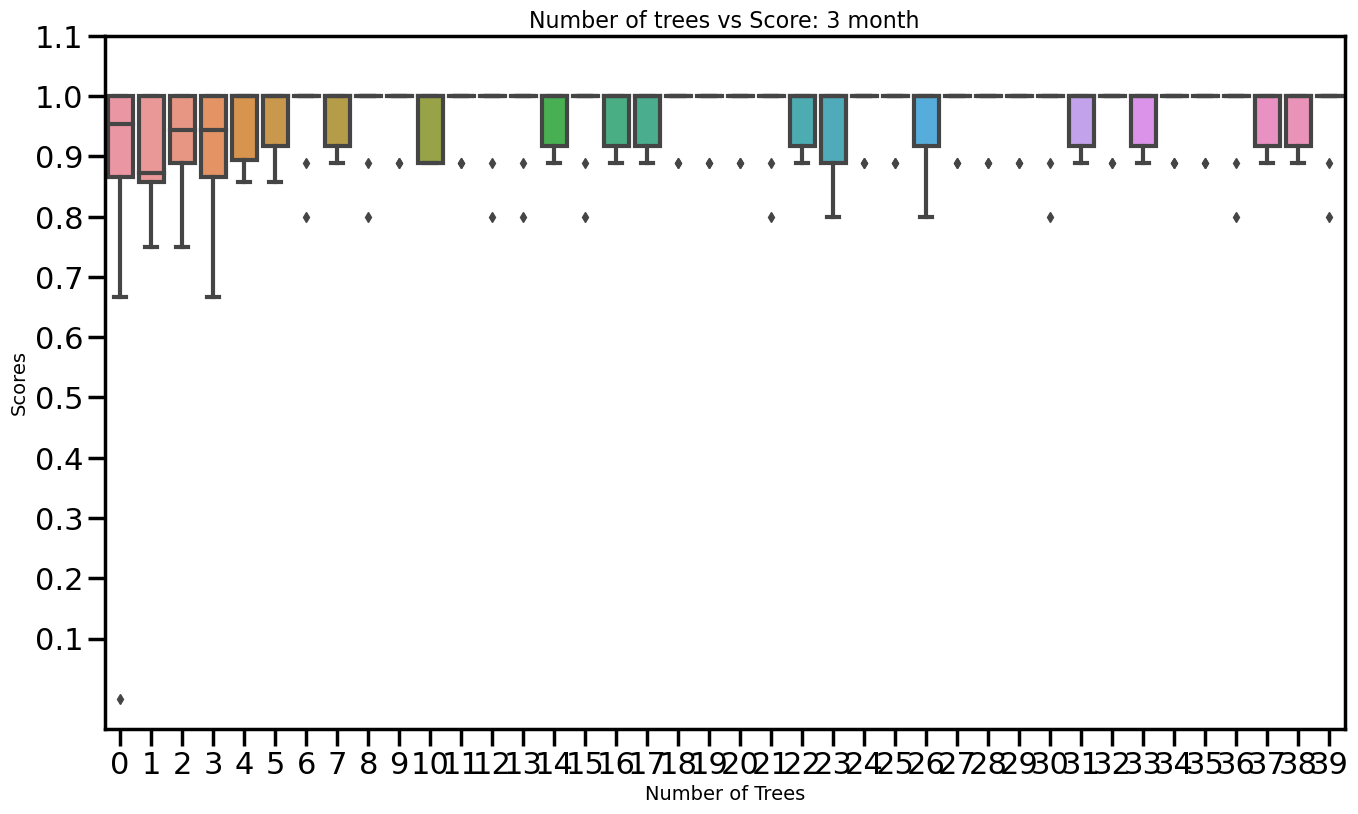

In [30]:
# plot the scores of the random forests as a function of the number of trees
plt.figure(figsize=(16,9))

# Scores of 10-fold cross-validation for random forests ranging from 1 to 40 trees as a box plot
sns.boxplot(data  = df_rf_3m.scores )

plt.title(  "Number of trees vs Score: 3 month", fontsize=16)
plt.xlabel( "Number of Trees", fontsize=14)
plt.ylabel( "Scores", fontsize=14)
plt.yticks( np.arange( 0.1, 1.2, 0.1 ) )
sns.set_context('poster')

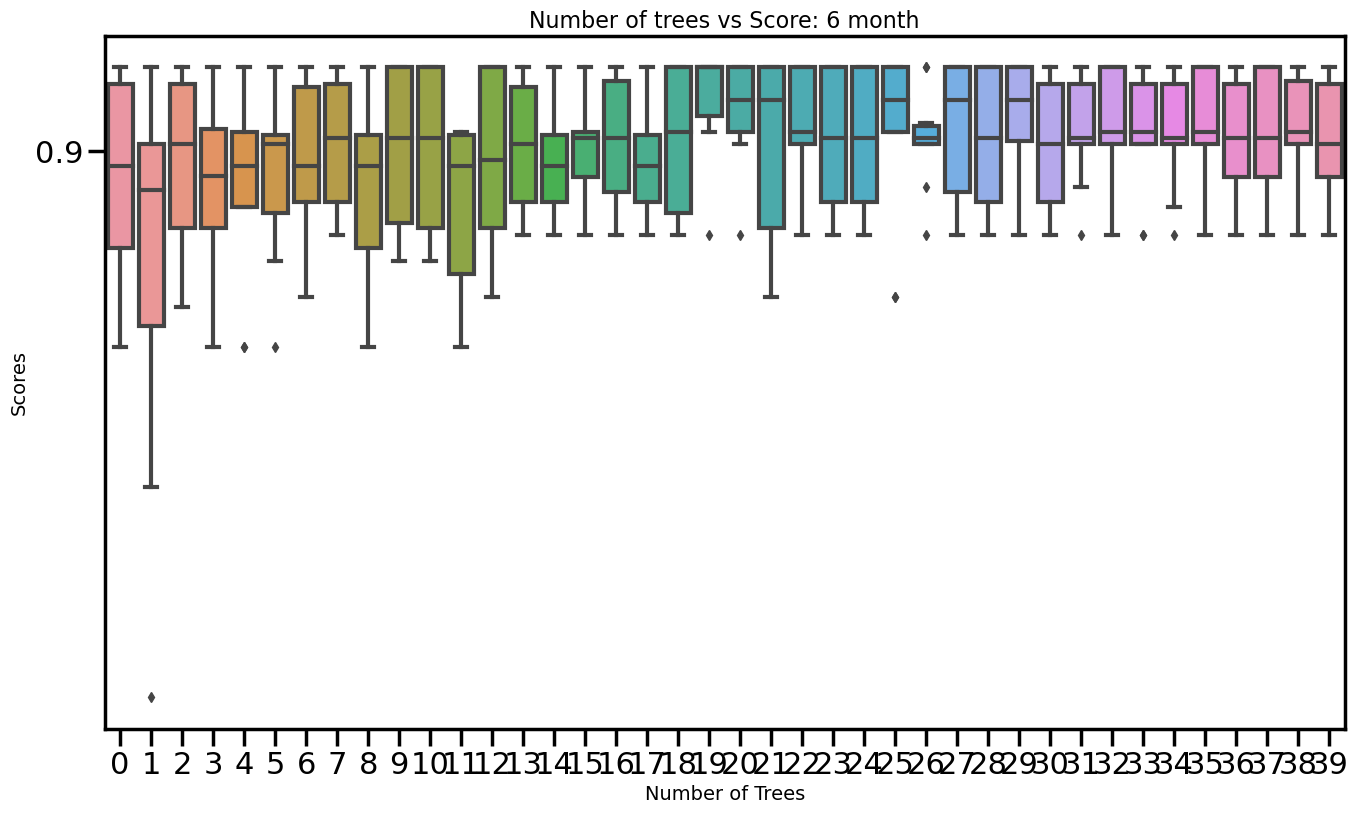

In [31]:
# plot the scores of the random forests as a function of the number of trees
plt.figure(figsize=(16,9))

# Scores of 10-fold cross-validation for random forests ranging from 1 to 40 trees as a box plot
sns.boxplot(data  = df_rf_6m.scores)

plt.title(  "Number of trees vs Score: 6 month", fontsize=16)
plt.xlabel( "Number of Trees", fontsize=14)
plt.ylabel( "Scores", fontsize=14)
plt.yticks( np.arange( 0.9, 1.0, 0.1 ) )
sns.set_context('poster')

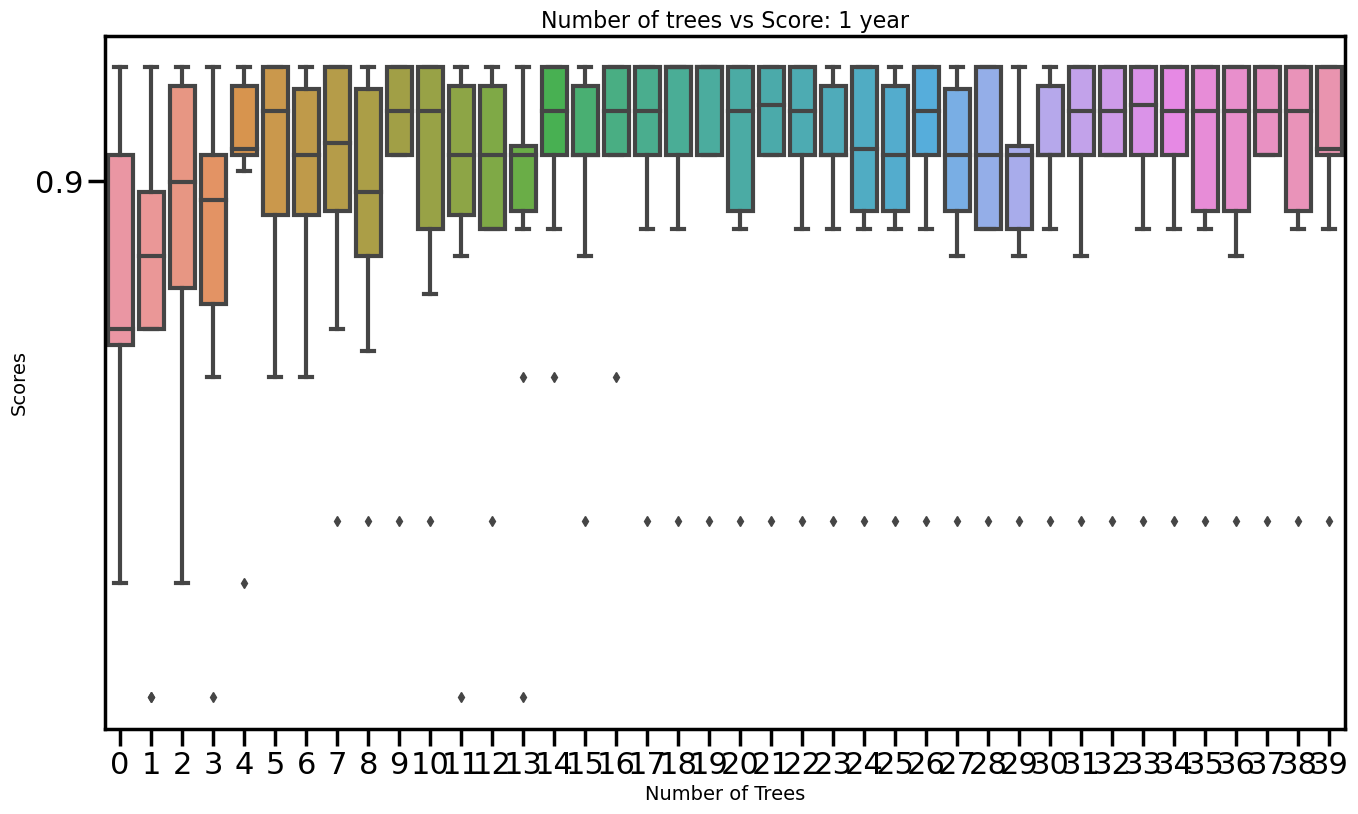

In [32]:
# plot the scores of the random forests as a function of the number of trees
plt.figure(figsize=(16,9))

# Scores of 10-fold cross-validation for random forests ranging from 1 to 40 trees as a box plot
sns.boxplot(data  = df_rf_1y.scores)

plt.title(  "Number of trees vs Score: 1 year", fontsize=16)
plt.xlabel( "Number of Trees", fontsize=14)
plt.ylabel( "Scores", fontsize=14)
plt.yticks( np.arange( 0.9, 1.0, 0.1 ) )
sns.set_context('poster')

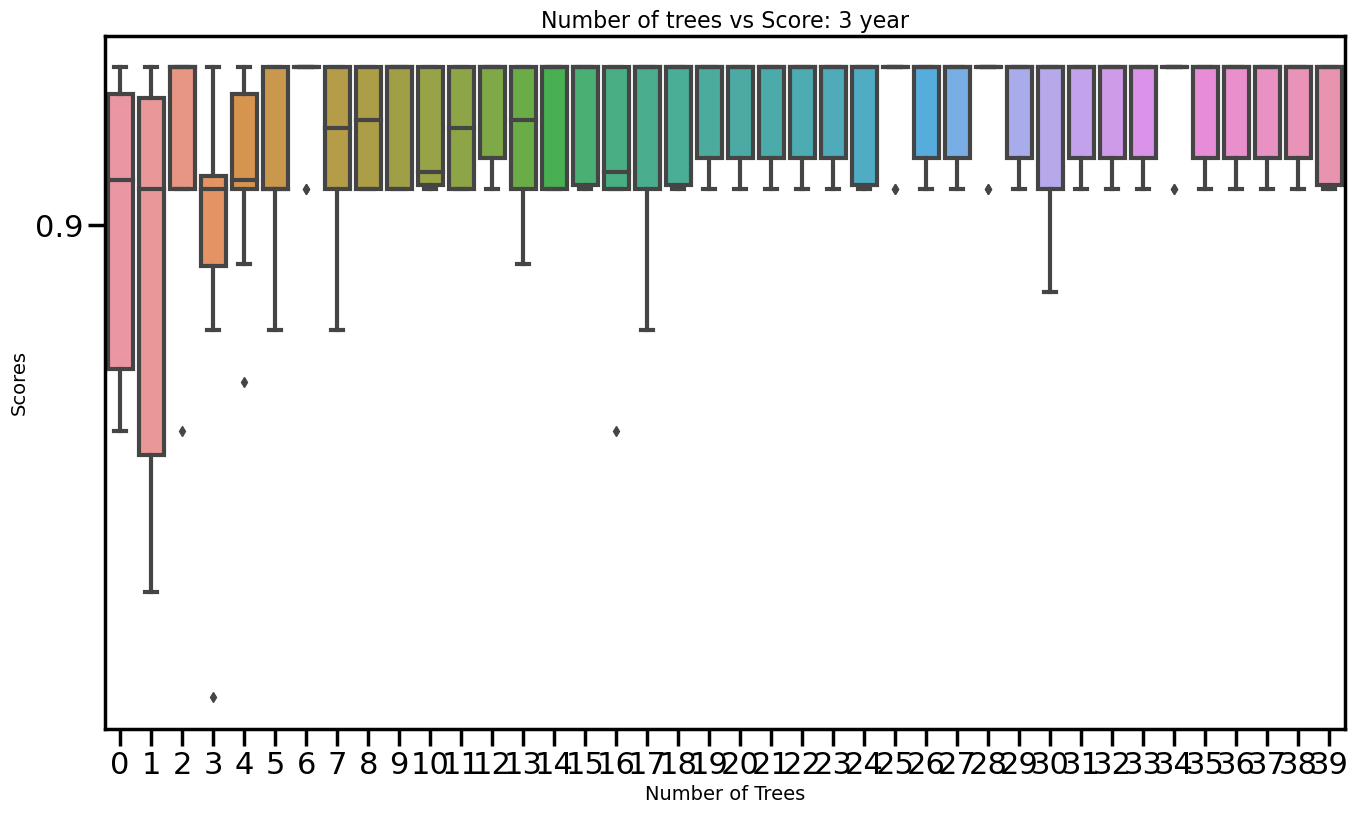

In [33]:
# plot the scores of the random forests as a function of the number of trees
plt.figure(figsize=(16,9))

# Scores of 10-fold cross-validation for random forests ranging from 1 to 40 trees as a box plot
sns.boxplot(data  = df_rf_3y.scores)

plt.title(  "Number of trees vs Score: 3 year", fontsize=16)
plt.xlabel( "Number of Trees", fontsize=14)
plt.ylabel( "Scores", fontsize=14)
plt.yticks( np.arange( 0.9, 1.0, 0.1 ) )
sns.set_context('poster')


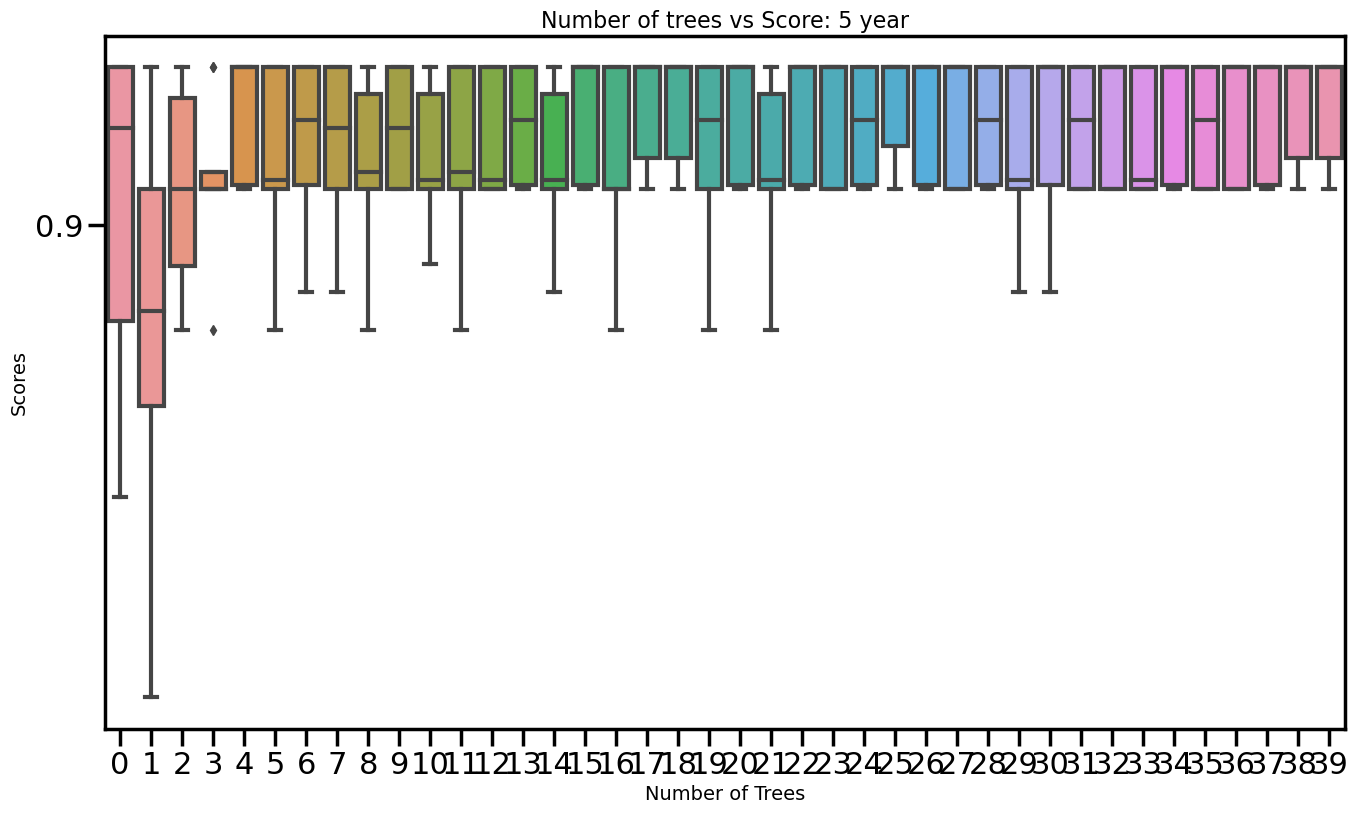

In [34]:
# plot the scores of the random forests as a function of the number of trees
plt.figure(figsize=(16,9))

# Scores of 10-fold cross-validation for random forests ranging from 1 to 40 trees as a box plot
sns.boxplot(data  = df_rf_5y.scores)

plt.title(  "Number of trees vs Score: 5 year", fontsize=16)
plt.xlabel( "Number of Trees", fontsize=14)
plt.ylabel( "Scores", fontsize=14)
plt.yticks( np.arange( 0.9, 1.0, 0.1 ) )
sns.set_context('poster')

In [35]:
##
# 1 month:
##
# Train random forest classifier with the optimal 27 estimators
## 
clf_1m = sklearn.ensemble.RandomForestClassifier( n_estimators = 27)
clf_1m = clf_1m.fit( X_1m[:100, :], Y_1m[:100] )

##
# 3 month:
##
# Train random forest classifier with the optimal 3 estimators
## 
clf_3m = sklearn.ensemble.RandomForestClassifier( n_estimators = 3)
clf_3m = clf_3m.fit( X_3m[:100, :], Y_3m[:100] )

##
# 6 month:
##
# Train random forest classifier with the optimal 2 estimators
## 
clf_6m = sklearn.ensemble.RandomForestClassifier( n_estimators = 2)
clf_6m = clf_6m.fit( X_6m[:100, :], Y_6m[:100] )

##
# 1 year:
##
# Train random forest classifier with the optimal 20 estimators
## 
clf_1y = sklearn.ensemble.RandomForestClassifier( n_estimators = 20)
clf_1y = clf_1y.fit( X_1y[:100, :], Y_1y[:100] )

##
# 3 year:
##
# Train random forest classifier with the optimal 3 estimators
## 
clf_3y = sklearn.ensemble.RandomForestClassifier( n_estimators = 3)
clf_3y = clf_3y.fit( X_3y[:1000, :], Y_3y[:1000] )

##
# 5 year:
##
# Train random forest classifier with the optimal 20 estimators
## 
clf_5y = sklearn.ensemble.RandomForestClassifier( n_estimators = 20)
clf_5y = clf_5y.fit( X_5y[:100, :], Y_5y[:100] )



# obtain the relative importance of the features 
feature_imp_1m = clf_1m.feature_importances_
feature_imp_3m = clf_3m.feature_importances_
feature_imp_6m = clf_6m.feature_importances_
feature_imp_1y = clf_1y.feature_importances_
feature_imp_3y = clf_3y.feature_importances_
feature_imp_5y = clf_5y.feature_importances_

#get column names
columns = ['Scheme Risk',
            'VRO Rating',
            'AUM',
            'Scheme AUM',
            'Latest NAV',
            'Minimum Investment',
            'Fund Return',
            'Category Return'
          ]

# Diagnostics - Check relative importance of features
print(feature_imp_1m)
print(feature_imp_3m)
print(feature_imp_6m)
print(feature_imp_1y)
print(feature_imp_3y)
print(feature_imp_5y)


# Plot feature importances for each time frame
index = np.arange( len(columns) - 2 )
bar_width = 0.3
opacity = 0.5

[0.08918161 0.11402573 0.0849724  0.10821018 0.16191509 0.04560013
 0.27949915 0.11659571]
[0.53515499 0.04187842 0.04142876 0.13576431 0.13256421 0.00695969
 0.04727074 0.05897888]
[0.22514372 0.07100397 0.07548524 0.04029168 0.14120031 0.01364298
 0.27997724 0.15325487]
[0.27422782 0.16092638 0.06835074 0.13050145 0.08807203 0.02219041
 0.08800447 0.16772669]
[0.11199803 0.4568304  0.02346769 0.0487602  0.06840562 0.05235611
 0.15538126 0.08280068]
[0.22025144 0.20858306 0.0284697  0.07411689 0.04392957 0.04519844
 0.16527218 0.21417872]


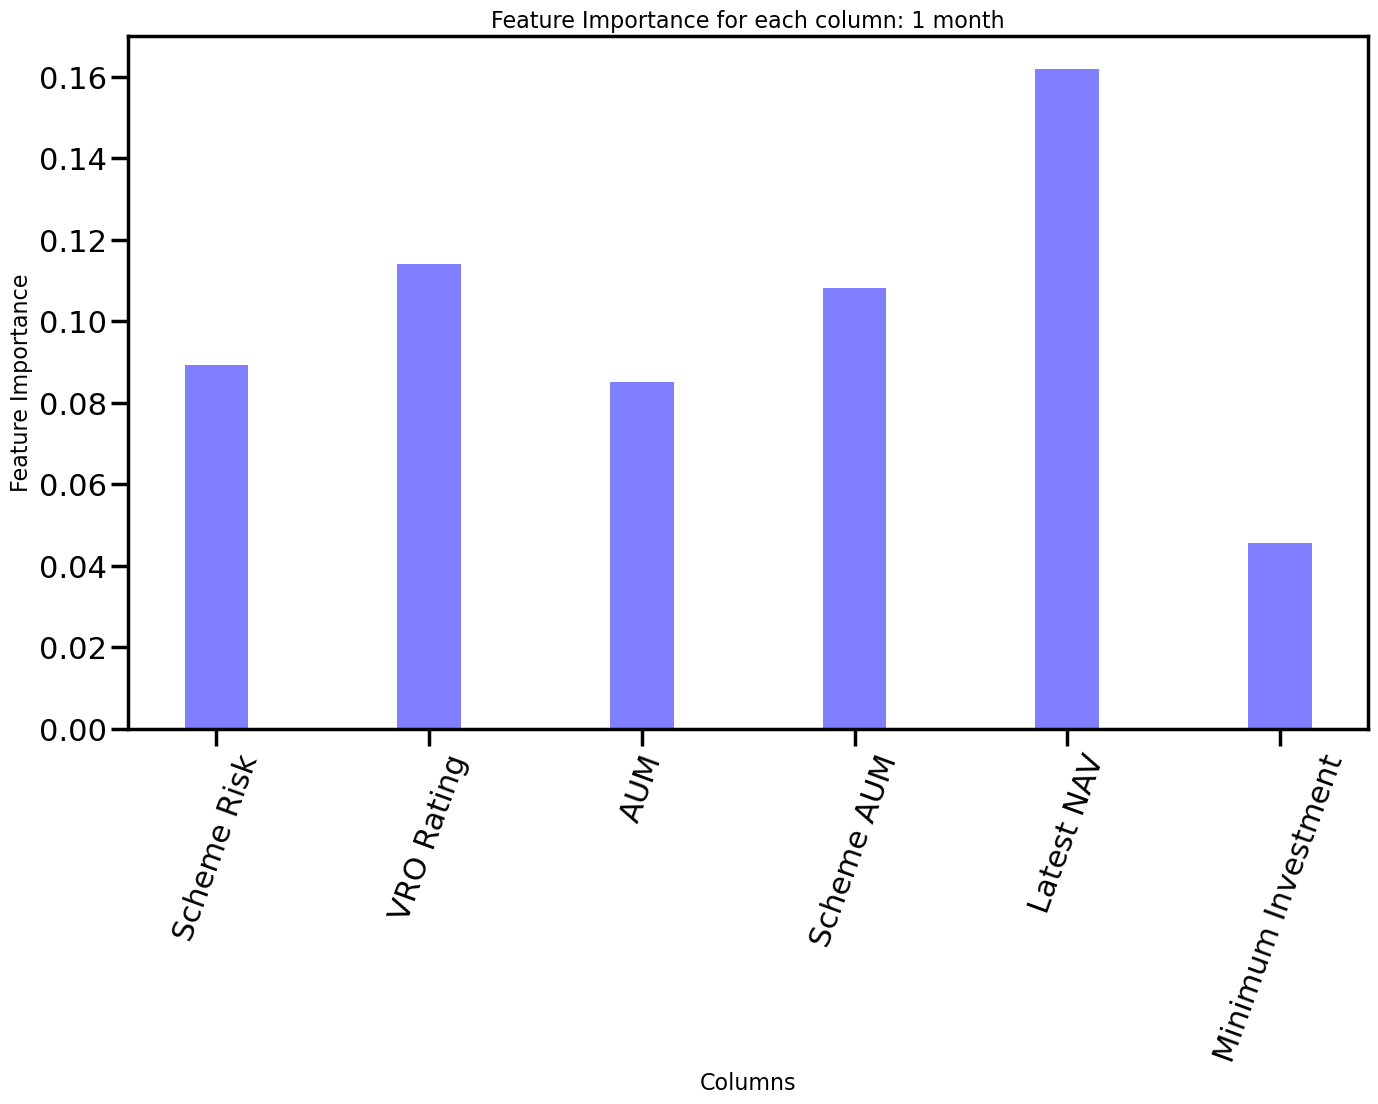

In [36]:
# 1 month
plt.figure( figsize = (16, 9) )
plt.bar(index,
        np.delete( feature_imp_1m, [6, 7]),
        bar_width,
        alpha=opacity,
        color='b',
        label='')

plt.xlabel('Columns', fontsize =16)
plt.ylabel('Feature Importance', fontsize =16)
plt.title('Feature Importance for each column: 1 month', fontsize = 16)
plt.xticks(index, np.delete(columns, [6,7]), rotation = 70)
plt.show()

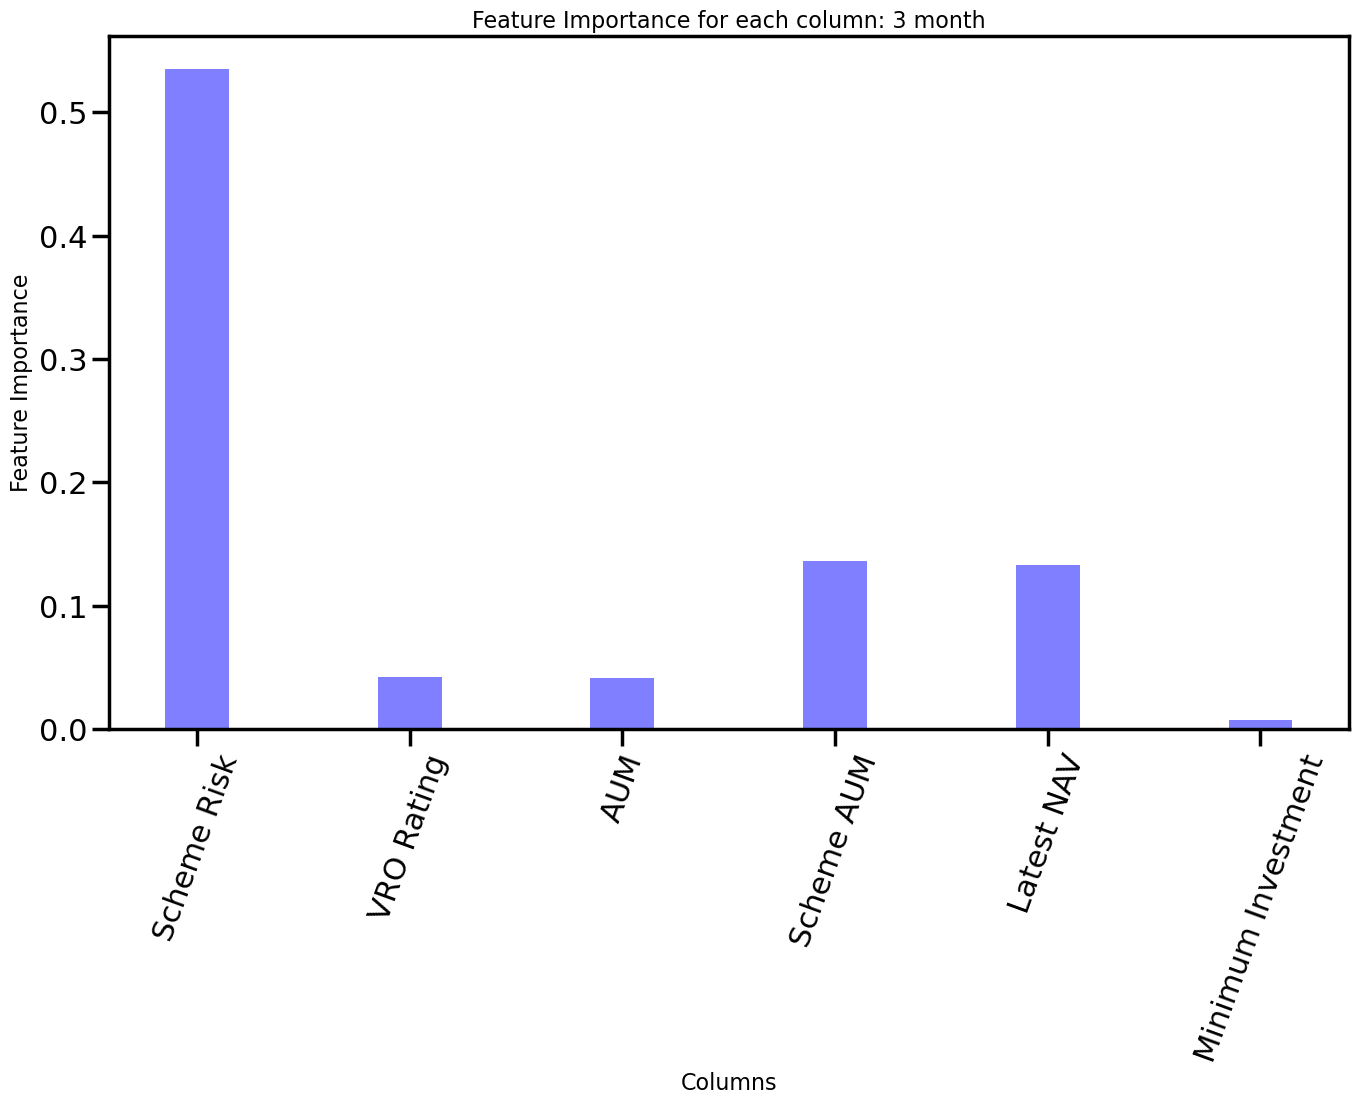

In [37]:
# 3 month
plt.figure( figsize = (16, 9) )
plt.bar(index,
        np.delete( feature_imp_3m, [6,7]),
        bar_width,
        alpha=opacity,
        color='b',
        label='')

plt.xlabel('Columns', fontsize =16)
plt.ylabel('Feature Importance', fontsize =16)
plt.title('Feature Importance for each column: 3 month', fontsize = 16)
plt.xticks(index, np.delete(columns, [6,7]), rotation = 70)
plt.show()

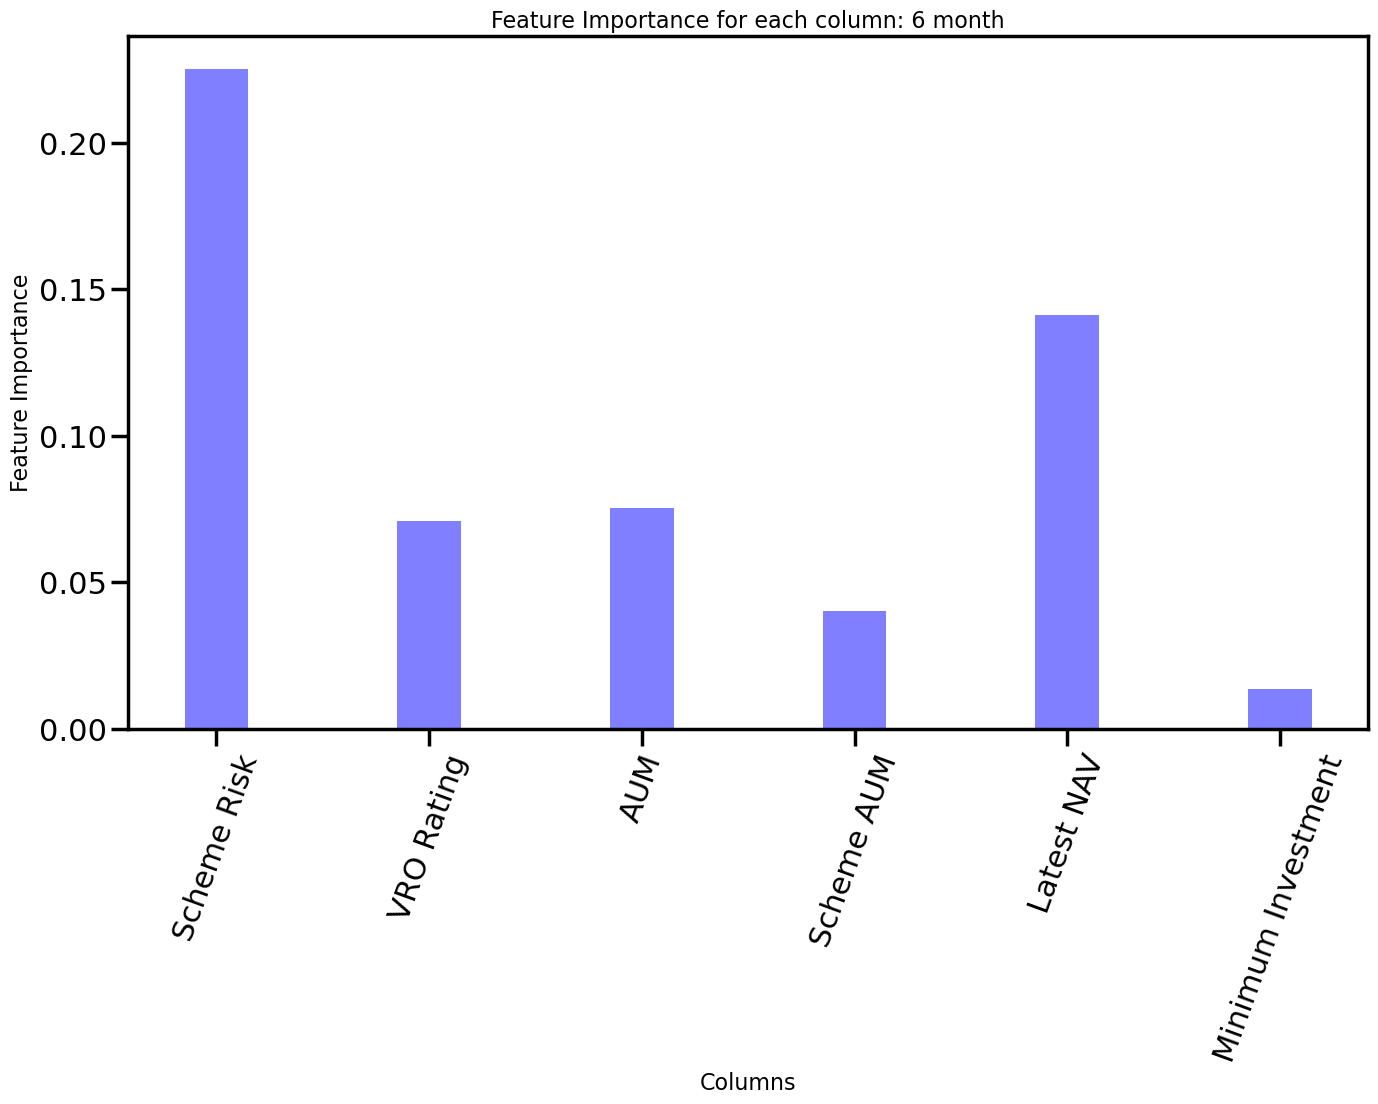

In [38]:
# 6 month
plt.figure( figsize = (16, 9) )
plt.bar(index,
        np.delete( feature_imp_6m, [6,7]),
        bar_width,
        alpha=opacity,
        color='b',
        label='')

plt.xlabel('Columns', fontsize =16)
plt.ylabel('Feature Importance', fontsize =16)
plt.title('Feature Importance for each column: 6 month', fontsize = 16)
plt.xticks(index, np.delete(columns, [6,7]), rotation = 70)
plt.show()

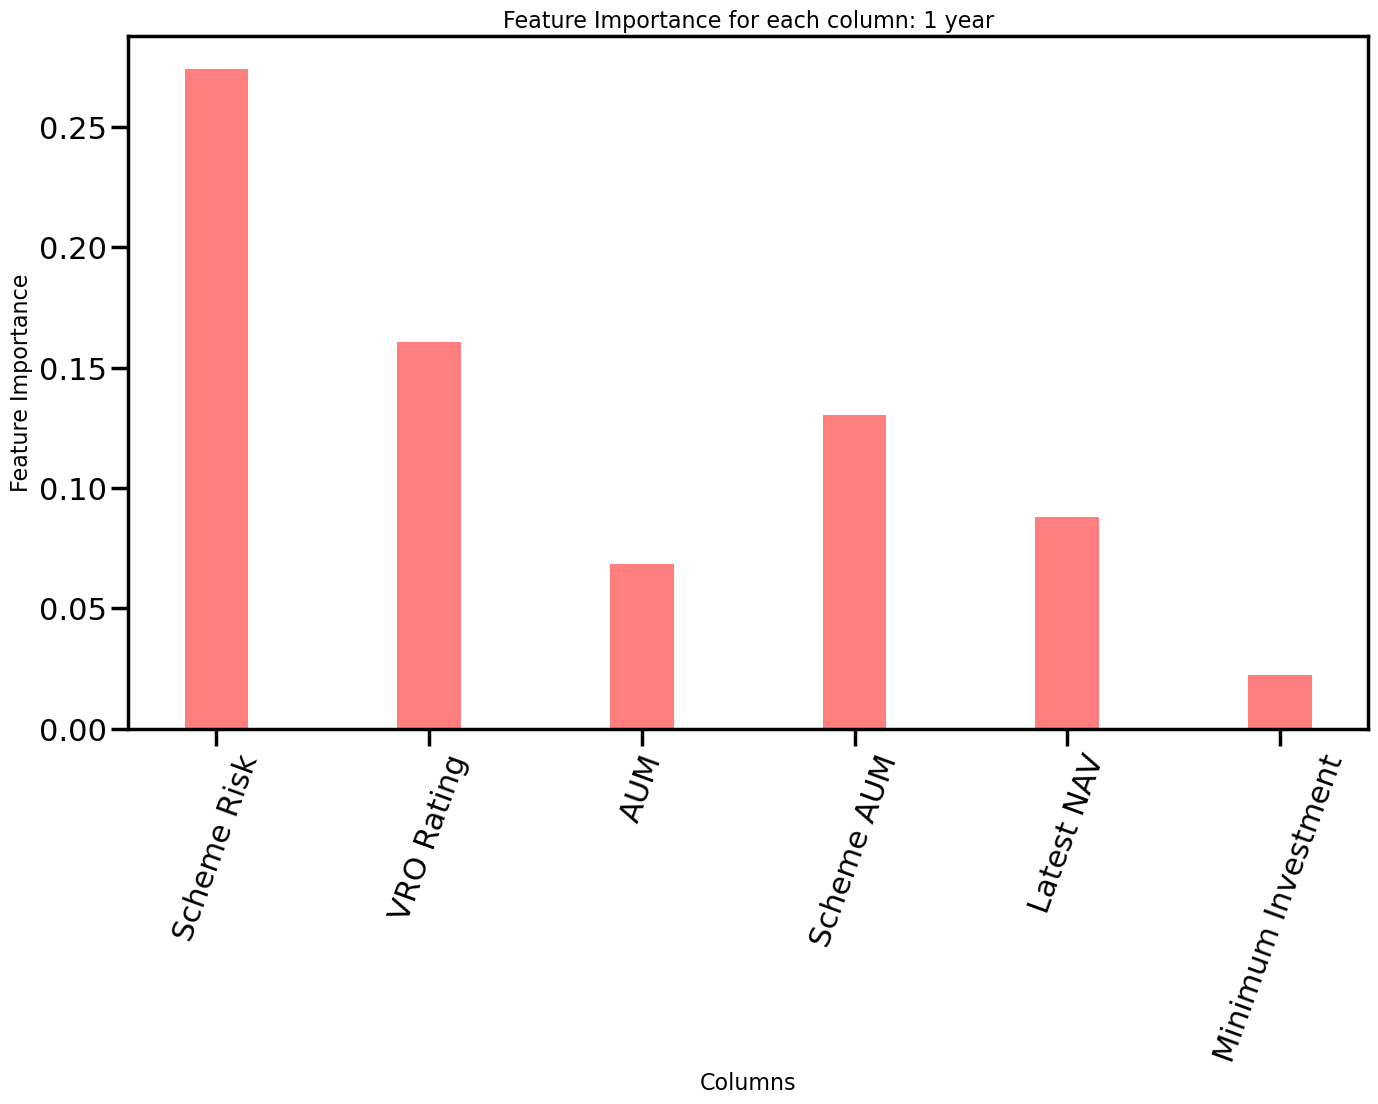

In [39]:
# 1 year
plt.figure( figsize = (16, 9) )
plt.bar(index,
        np.delete( feature_imp_1y, [6,7]),
        bar_width,
        alpha=opacity,
        color='r',
        label='')

plt.xlabel('Columns', fontsize =16)
plt.ylabel('Feature Importance', fontsize =16)
plt.title('Feature Importance for each column: 1 year', fontsize = 16)
plt.xticks(index, np.delete(columns, [6,7]), rotation = 70)
plt.show()

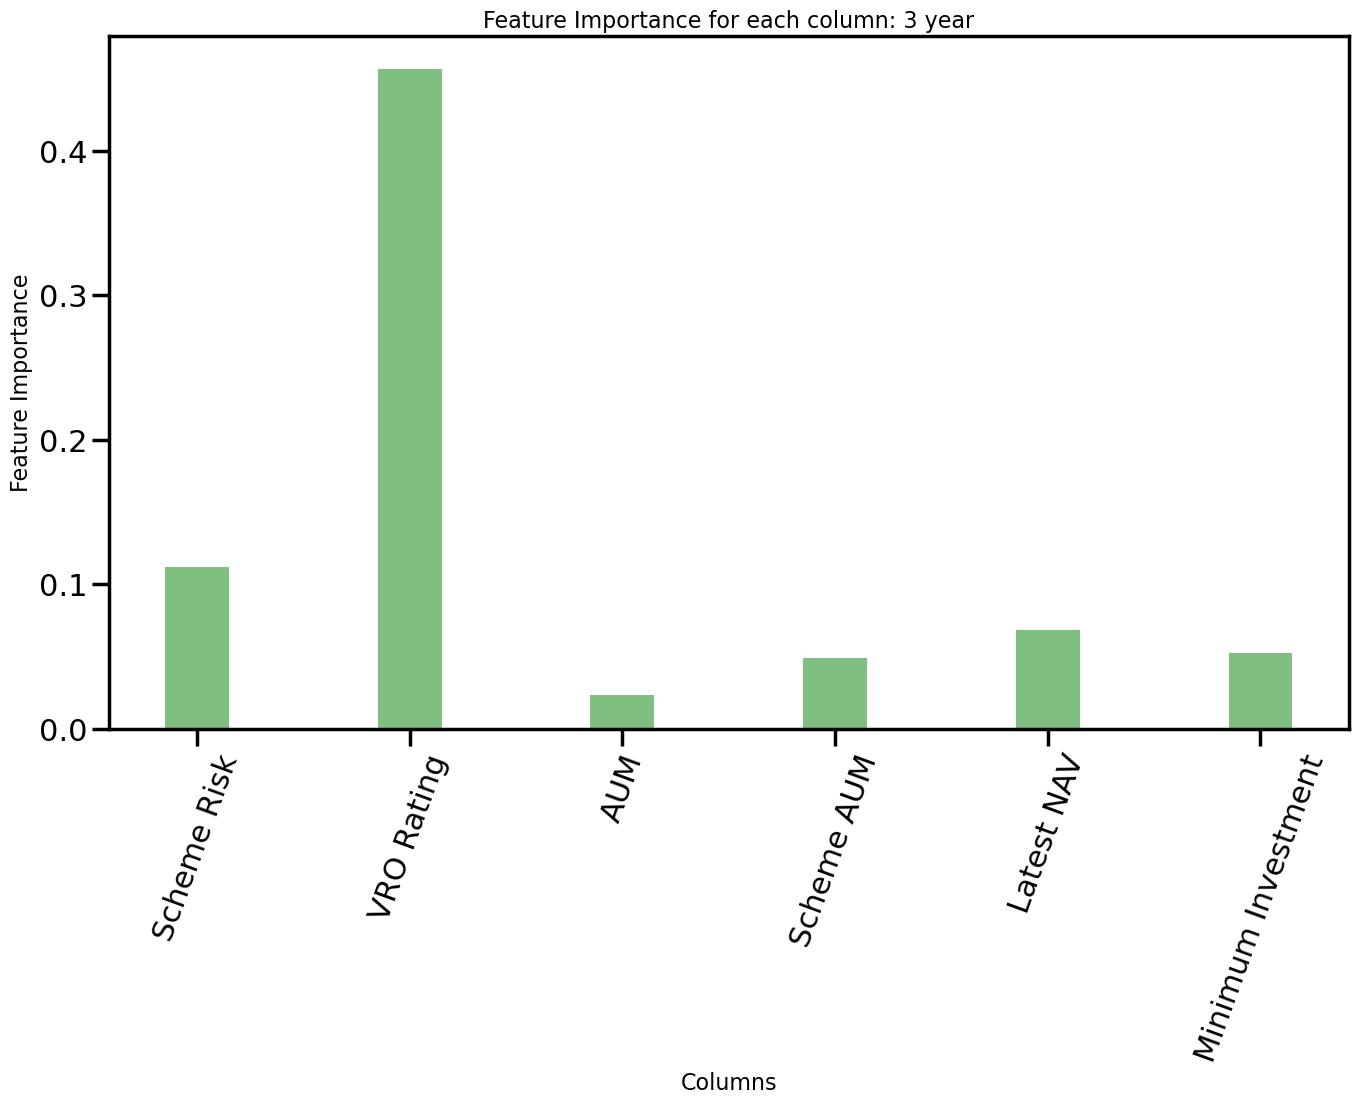

In [40]:
# 3 year
plt.figure( figsize = (16, 9) )
plt.bar(index,
        np.delete( feature_imp_3y, [6,7]),
        bar_width,
        alpha=opacity,
        color='g',
        label='')

plt.xlabel('Columns', fontsize =16)
plt.ylabel('Feature Importance', fontsize =16)
plt.title('Feature Importance for each column: 3 year', fontsize = 16)
plt.xticks(index, np.delete(columns, [6,7]), rotation = 70)
plt.show()

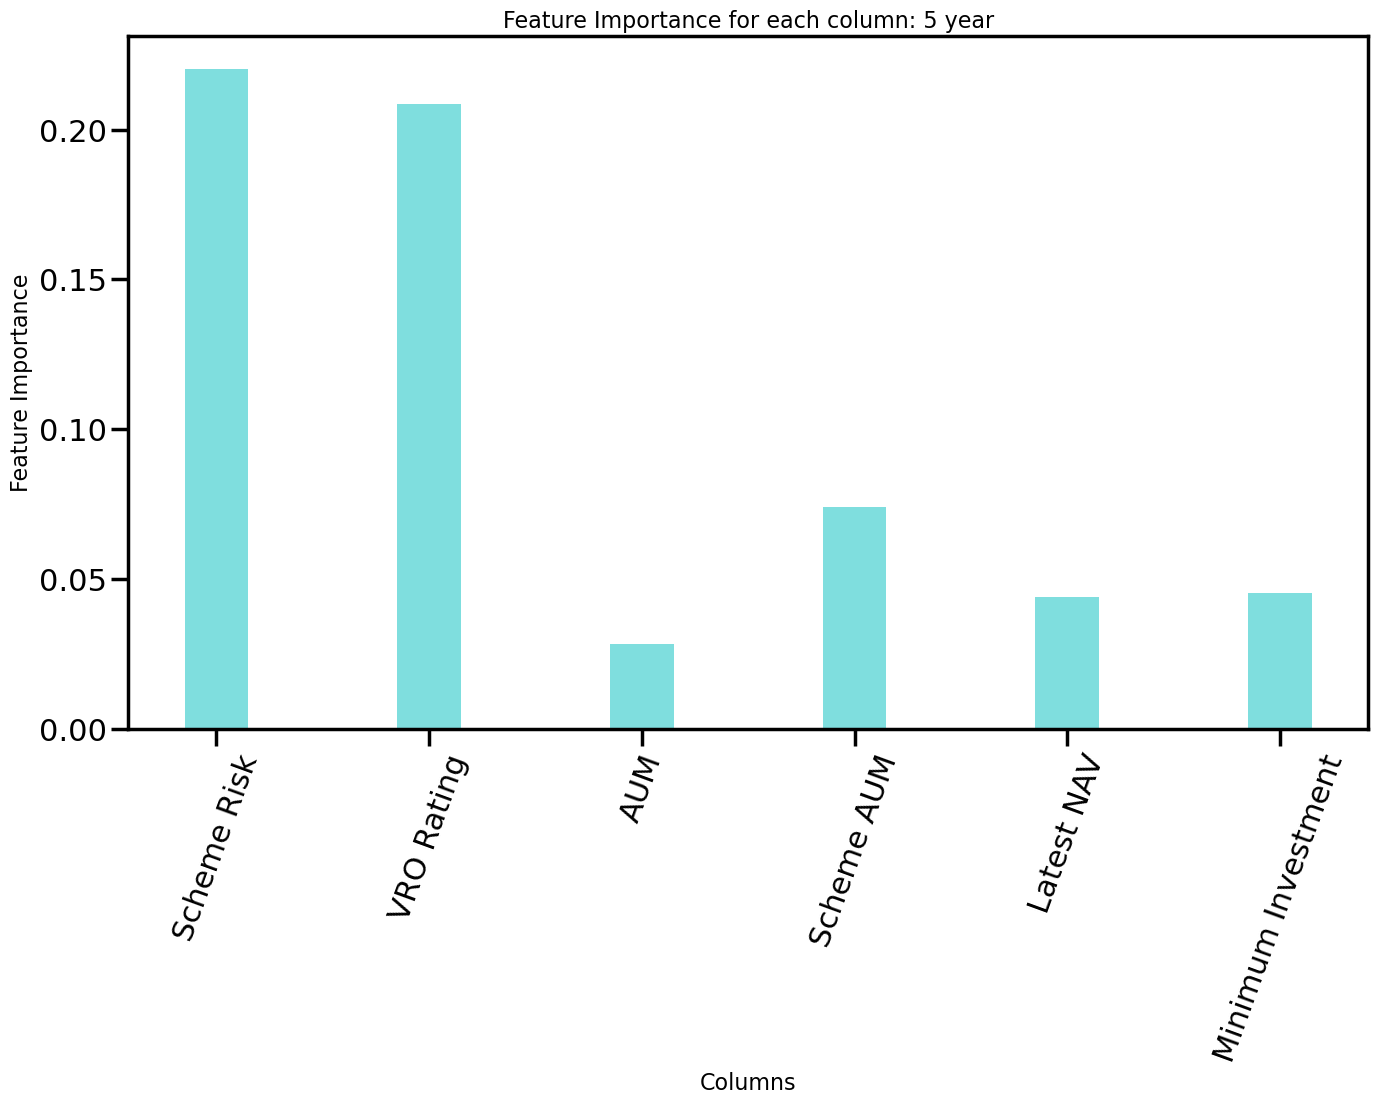

In [41]:
# 5 year
plt.figure( figsize = (16, 9) )
plt.bar(index,
        np.delete( feature_imp_5y, [6,7]),
        bar_width,
        alpha=opacity,
        color='c',
        label='')

plt.xlabel('Columns', fontsize =16)
plt.ylabel('Feature Importance', fontsize =16)
plt.title('Feature Importance for each column: 5 year', fontsize = 16)
plt.xticks(index, np.delete(columns, [6,7]), rotation = 70)
plt.show()

In [42]:
##
# Predict good and bad fund based on Random Forest Classification
##
Y_1m_predicted = clf_1m.predict( X_1m )
Y_3m_predicted = clf_3m.predict( X_3m )
Y_6m_predicted = clf_6m.predict( X_6m )
Y_1y_predicted = clf_1y.predict( X_1y )
Y_3y_predicted = clf_3y.predict( X_3y )
Y_5y_predicted = clf_5y.predict( X_5y )

In [45]:
##
# Model Evaluation: Classification Score
##
clf_1m_score = clf_1m.score(X_1m[100:, :], Y_1m[100:], sample_weight=None)
clf_3m_score = clf_3m.score(X_3m[100:, :], Y_3m[100:], sample_weight=None)
clf_6m_score = clf_6m.score(X_6m[100:, :], Y_6m[100:], sample_weight=None)
clf_1y_score = clf_1y.score(X_1y[100:, :], Y_1y[100:], sample_weight=None)
clf_3y_score = clf_3y.score(X_3y[100:, :], Y_3y[100:], sample_weight=None)
clf_5y_score = clf_5y.score(X_5y[100:, :], Y_5y[100:], sample_weight=None)

print(clf_1m_score)
print(clf_3m_score)
print(clf_6m_score)
print(clf_1y_score)
print(clf_3y_score)
print(clf_5y_score)

0.8524590163934426
0.8688524590163934
0.819672131147541
0.9508196721311475
1.0
0.9016393442622951


In [46]:
print('Timeframe: {0}\nScore: {1}\n'.format('1m', clf_1m_score) ) 
print('Timeframe: {0}\nScore: {1}\n'.format('3m', clf_3m_score) ) 
print('Timeframe: {0}\nScore: {1}\n'.format('6m', clf_6m_score) ) 
print('Timeframe: {0}\nScore: {1}\n'.format('1y', clf_1y_score) ) 
print('Timeframe: {0}\nScore: {1}\n'.format('3y', clf_3y_score) ) 
print('Timeframe: {0}\nScore: {1}\n'.format('5y', clf_5y_score) )

Timeframe: 1m
Score: 0.8524590163934426

Timeframe: 3m
Score: 0.8688524590163934

Timeframe: 6m
Score: 0.819672131147541

Timeframe: 1y
Score: 0.9508196721311475

Timeframe: 3y
Score: 1.0

Timeframe: 5y
Score: 0.9016393442622951



In [47]:
## 
# List of good funds for each time frame
## 
good_funds_1m = [ fund_schemes[k] for (k, v) in enumerate( Y_1m_predicted ) if v == 1.0 ]
good_funds_3m = [ fund_schemes[k] for (k, v) in enumerate( Y_3m_predicted ) if v == 1.0 ]
good_funds_6m = [ fund_schemes[k] for (k, v) in enumerate( Y_6m_predicted ) if v == 1.0 ]
good_funds_1y = [ fund_schemes[k] for (k, v) in enumerate( Y_1y_predicted ) if v == 1.0 ]
good_funds_3y = [ fund_schemes[k] for (k, v) in enumerate( Y_3y_predicted ) if v == 1.0 ]
good_funds_5y = [ fund_schemes[k] for (k, v) in enumerate( Y_5y_predicted ) if v == 1.0 ]

In [48]:
good_funds_1m_sort = [ [ fund['schemename'], fund[ 'fund_ret_1m' ], fund[ 'fund_ret_3m' ], fund[ 'fund_ret_6m' ], fund[ 'fund_ret_1y' ], fund[ 'fund_ret_3y' ], fund[ 'fund_ret_5y' ] ] for fund in good_funds_1m]

good_funds_3m_sort = [ [ fund['schemename'], fund[ 'fund_ret_1m' ], fund[ 'fund_ret_3m' ], fund[ 'fund_ret_6m' ], fund[ 'fund_ret_1y' ], fund[ 'fund_ret_3y' ], fund[ 'fund_ret_5y' ] ] for fund in good_funds_3m]

good_funds_6m_sort = [ [ fund['schemename'], fund[ 'fund_ret_1m' ], fund[ 'fund_ret_3m' ], fund[ 'fund_ret_6m' ], fund[ 'fund_ret_1y' ], fund[ 'fund_ret_3y' ], fund[ 'fund_ret_5y' ] ] for fund in good_funds_6m]

good_funds_1y_sort = [ [ fund['schemename'], fund[ 'fund_ret_1m' ], fund[ 'fund_ret_3m' ], fund[ 'fund_ret_6m' ], fund[ 'fund_ret_1y' ], fund[ 'fund_ret_3y' ], fund[ 'fund_ret_5y' ] ] for fund in good_funds_1y]

good_funds_3y_sort = [ [ fund['schemename'], fund[ 'fund_ret_1m' ], fund[ 'fund_ret_3m' ], fund[ 'fund_ret_6m' ], fund[ 'fund_ret_1y' ], fund[ 'fund_ret_3y' ], fund[ 'fund_ret_5y' ] ] for fund in good_funds_3y]

good_funds_5y_sort = [ [ fund['schemename'], fund[ 'fund_ret_1m' ], fund[ 'fund_ret_3m' ], fund[ 'fund_ret_6m' ], fund[ 'fund_ret_1y' ], fund[ 'fund_ret_3y' ], fund[ 'fund_ret_5y' ] ] for fund in good_funds_5y]


In [50]:

    print( '## Top 5 funds for a timeframe of 1 month:')
    print( good_funds_1m_sort[:5] )

    print( '## Top 5 funds for a timeframe of 3 months:')
    print( good_funds_3m_sort[:5] )

    print( '## Top 5 funds for a timeframe of 6 months:')
    print( good_funds_6m_sort[:5] )

    print( '## Top 5 funds for a timeframe of 1 year:')
    print( good_funds_1y_sort[:5] )

    print( '## Top 5 funds for a timeframe of 3 years:')
    print( good_funds_3y_sort[:5] )

    print( '## Top 5 funds for a timeframe of 5 years:')
    print( good_funds_5y_sort[:5] )

## Top 5 funds for a timeframe of 1 month:
[['SBI Magnum Mid Cap Direct Plan-Growth', 3.23, -1.71, -1.93, 12.04, 27.49, 13.77], ['Kotak Emerging Equity Fund Direct-Growth', 1.84, -2.94, -0.34, 12.8, 24.71, 15.35], ['Nippon India Small Cap Fund Direct- Growth', 0.89, -4.1, 2.22, 15.89, 34.48, 16.18], ['Kotak Equity Opportunities Fund Direct-Growth', 0.88, -3.39, 1.02, 11.63, 19.69, 13.86], ['Nippon India Growth Fund Direct- Growth', 0.68, -5.59, -0.65, 10.05, 23.25, 14.48]]
## Top 5 funds for a timeframe of 3 months:
[['Aditya Birla Sun Life Arbitrage Fund Direct-Growth', 0.53, 1.92, 3.11, 5.16, 4.69, 5.5], ['IDFC Arbitrage Fund Direct-Growth', 0.55, 1.91, 3.18, 5.19, 4.55, 5.48], ['UTI Arbitrage Fund Direct-Growth', 0.55, 1.91, 3.08, 5.02, 4.67, 5.46], ['Nippon India Arbitrage Fund Direct-Growth', 0.55, 1.9, 3.17, 5.26, 4.81, 5.66], ['Axis Arbitrage Fund Direct-Growth', 0.54, 1.9, 3.05, 5.17, 4.79, 5.56]]
## Top 5 funds for a timeframe of 6 months:
[['ICICI Prudential Value Discovery D

In [52]:
print( sum(Y_1m), sum(Y_3m), sum(Y_6m), sum(Y_1y), sum(Y_3y), sum(Y_5y))

# Print the number of total samples
print( len(Y_1m), len(Y_3m), len(Y_6m), len(Y_1y), len(Y_3y), len(Y_5y))

64 80 111 117 119 118
161 161 161 161 161 161
